In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

plt.rcParams['font.family'] = 'Malgun Gothic'

data = pd.read_csv("dataset/avocado.csv")

# data = data.loc[data['Entity'] == "North Korea"]

X = data.drop(['Total Volume','Date', 'type','region'], axis= 1)
y = data['Total Volume']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2, random_state=42)

rf_model = LinearRegression()
rf_model.fit(X_train,y_train)

feature_importance = pd.DataFrame({
    "특성": X.columns,
    "중요도": rf_model.coef_
}).sort_values("중요도", ascending=False)

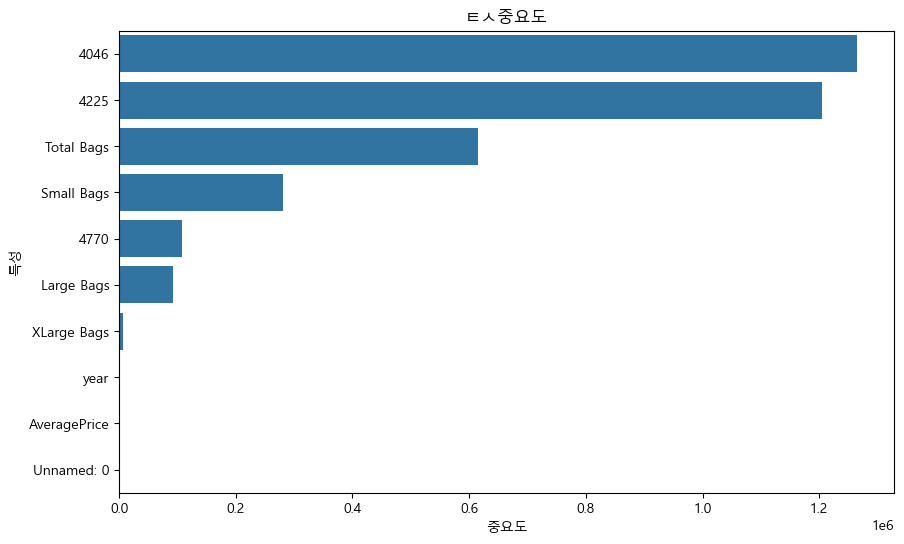

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title("ㅌㅅ중요도")
plt.show()